### ipywidget

In [149]:
import ipywidgets as widgets
from ipywidgets import interactive
import pandas as pd

In [150]:
data = pd.read_csv("/Users/mdobbali/Downloads/multi_box_shipment_data.csv", index_col=0)

In [151]:
data.item_short_sku_num = data.item_short_sku_num.astype(str)
data.item_full_sku_num = data.item_full_sku_num.astype(str)

In [152]:
def filter_data(SKU=''):
    SKU_list = SKU.split(",")
    full_sku_list = []
    for item in SKU_list:
        item = item.strip()
        SKU = item
        full_sku_list.append(item)
    print(full_sku_list)
    if SKU == 'All':
        return data
    else:
        str_sku = len(SKU)
        if str_sku < 11:
            df = data[data["item_short_sku_num"].isin(full_sku_list)]
            #df = data[data["item_short_sku_num"] == SKU]
            #df = df.reset_index(drop = True)
        else:
            df = data[data["item_full_sku_num"].isin(full_sku_list)]
            #df = data[data["item_full_sku_num"] == SKU]
            #df = df.reset_index(drop = True)
    return df

items = ['All']+sorted(data['item_full_sku_num'].unique().tolist())+sorted(data['item_short_sku_num'].unique().tolist())

def plot_f(SKU):   
    sample_data = data[data["item_short_sku_num"] == SKU]
    plt.plot(sample_data["num_boxes"].tolist(), sample_data["item_qty"].tolist(), 'ro')
    plt.axis([0, 20, 0,20])
    plt.xlabel("num_boxes")
    plt.ylabel("item_qty")
    plt.show()
    
w = widgets.Text(options = items)
interactive(filter_data, SKU=w)

['1002610', '10038870']


,item_full_sku_num,item_qty,num_boxes,num_sls_trans_id,item_short_sku_num
0,1002610-000-000,1,1,2,1002610
4,10038870-000-000,1,1,3,10038870
5,10038870-000-000,1,2,1,10038870
6,10038870-000-000,2,1,3,10038870
7,10038870-000-000,2,2,3,10038870
8,10038870-000-004,1,1,2,10038870
9,10038870-000-004,1,2,4,10038870
10,10038870-000-004,2,1,7,10038870
11,10038870-000-004,2,2,2,10038870
12,10038870-000-004,3,3,1,10038870


REF : https://blog.ouseful.info/2016/12/29/simple-view-controls-for-pandas-dataframes-using-ipython-widgets/

#### Graph

In [153]:
import matplotlib.pyplot as plt

In [154]:
sample_data = data[data["item_short_sku_num"] == "10038870"]

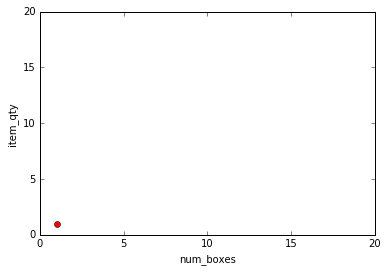

In [155]:
def plot_f(SKU):   
    SKU_list = SKU.split(",")
    full_sku_list = []
    for item in SKU_list:
        item = item.strip()
        SKU = item
        full_sku_list.append(item)
        
    sample_data = data[data["item_short_sku_num"].isin(full_sku_list)]
    plt.plot(sample_data["num_boxes"].tolist(), sample_data["item_qty"].tolist(), 'ro')
    plt.axis([0, 20, 0,20])
    plt.xlabel("num_boxes")
    plt.ylabel("item_qty")
    plt.show()

    
w = widgets.Text(options = items)
interactive(plot_f, SKU=w)

In [156]:
"10038870, 1002610".split(",")

['10038870', ' 1002610']

In [157]:
data[data["item_short_sku_num"].isin(['10038870', '1002610'])]

,item_full_sku_num,item_qty,num_boxes,num_sls_trans_id,item_short_sku_num
0,1002610-000-000,1,1,2,1002610
4,10038870-000-000,1,1,3,10038870
5,10038870-000-000,1,2,1,10038870
6,10038870-000-000,2,1,3,10038870
7,10038870-000-000,2,2,3,10038870
8,10038870-000-004,1,1,2,10038870
9,10038870-000-004,1,2,4,10038870
10,10038870-000-004,2,1,7,10038870
11,10038870-000-004,2,2,2,10038870
12,10038870-000-004,3,3,1,10038870
